# Checking the accuracy of the program vector
We make clean two dimensional scatter plots for every RIASEC pair. 

In [1]:
# Simple setup and data load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from pathlib import Path

### 1. Data Load 

In [2]:

VECTORS_DIR = Path("../data_RIASEC") 
L2_PATH = VECTORS_DIR / "df_RIASEC_programmes_vectors.csv" 

# Load whichever exists 
if L2_PATH.exists():
    df = pd.read_csv(L2_PATH) 
    version = "L2" 
else: 
    raise FileNotFoundError("No vectors file found in data_intermediate. Run the vector notebook first.") 

# Keep required columns 
LETTERS = ["R","I","A","S","E","C"] 
need = ["programme_title"] + LETTERS 
missing = [c for c in need if c not in df.columns] 
if missing:
    raise ValueError(f"Missing columns: {missing}") 
df = df[need].copy() 
# Add dominant letter for coloring 
df["dominant"] = df[LETTERS].idxmax(axis=1) 
print(f"Loaded {len(df)} programmes with {version} vectors.") 
df.head(3)

Loaded 17 programmes with L2 vectors.


,programme_title,R,I,A,S,E,C,dominant
0,Ancient Studies,0.238792,0.692737,0.537674,0.317944,0.115459,0.244094,I
1,Archaeology,0.549677,0.738811,0.284720,0.154223,0.090494,0.197419,I
2,Artificial Intelligence,0.247142,0.783849,0.235725,0.433883,0.122451,0.256293,I


### 2. Color map and small helpers

In [3]:
# Color map for letters, readable and color blind friendly
COLORS = {
    "R": "#1f77b4",  # blue
    "I": "#ff7f0e",  # orange
    "A": "#2ca02c",  # green
    "S": "#d62728",  # red
    "E": "#9467bd",  # purple
    "C": "#8c564b",  # brown
}

def letter_color(letter: str) -> str:
    return COLORS.get(letter, "#7f7f7f")

def add_zero_margins(ax, x, y, pad=0.02):
    """Give a tiny margin so dots are not glued to the axes."""
    xmin, xmax = x.min(), x.max()
    ymin, ymax = y.min(), y.max()
    dx = (xmax - xmin) if xmax > xmin else 1.0
    dy = (ymax - ymin) if ymax > ymin else 1.0
    ax.set_xlim(xmin - pad*dx, xmax + pad*dx)
    ax.set_ylim(ymin - pad*dy, ymax + pad*dy)


### 3. Plot one pair at a time

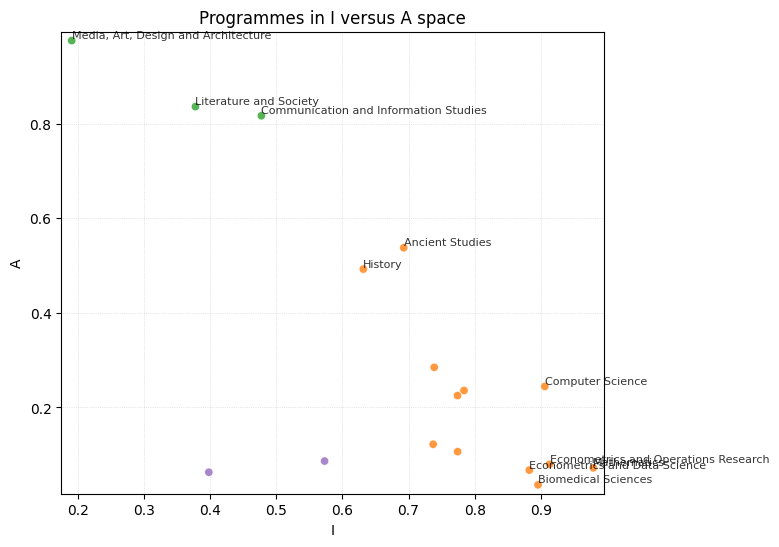

In [4]:
# Plot a single pair with clean labels

def plot_pair(df_pair: pd.DataFrame, x_letter: str, y_letter: str, annotate: bool=False):
    x = df_pair[x_letter].to_numpy()
    y = df_pair[y_letter].to_numpy()
    colors = df_pair["dominant"].map(letter_color).to_numpy()

    fig, ax = plt.subplots(figsize=(7, 6))
    ax.scatter(x, y, c=colors, alpha=0.8, edgecolors="white", linewidths=0.5)

    ax.set_xlabel(f"{x_letter}")
    ax.set_ylabel(f"{y_letter}")
    ax.set_title(f"Programmes in {x_letter} versus {y_letter} space")

    # Light grid for reading values
    ax.grid(True, linestyle=":", linewidth=0.5, alpha=0.6)

    # Add margins
    add_zero_margins(ax, x, y)

    # Optional tiny labels for a few points at extremes
    if annotate:
        # Label the top five by x and top five by y to avoid clutter
        top_x = np.argsort(-x)[:5]
        top_y = np.argsort(-y)[:5]
        idxs = set(top_x.tolist() + top_y.tolist())
        for i in idxs:
            ax.text(x[i], y[i], df_pair["programme_title"].iloc[i],
                    fontsize=8, ha="left", va="bottom", alpha=0.8)

    plt.show()

# Example
plot_pair(df, "I", "A", annotate=True)


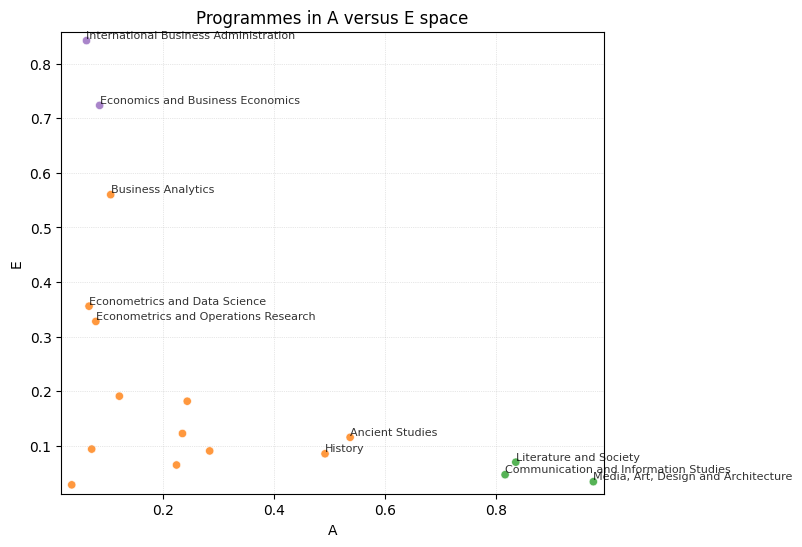

In [7]:
plot_pair(df, "A", "E", annotate=True)